# Simulação de Lançamento Com Arrasto

Este segundo projeto possui as mesmas características do anterior, visto me `cinematica1/main.ipynb`, no entanto com a adição da força resistiva $R$.

## Projeto

Adicionar arrasto à simulação de balística, movimento do projétil.

## Código

In [165]:
import math
import numpy as np
import matplotlib.pyplot as plt

A partícula sendo lançada com uma angulação menor que $90^{\circ}$, apresentará uma trajetória não vertical em relação ao solo, analogamente, caso o angulo de lançamento seja de $0^{\circ}$ podemos designa-lo como um lançamento horigontal.

A trajetória acontece com a associação de dois movimentos:
- O componente horizontal de movimento;
- O componente vertical de movimento.

Teremos o componente horizontal como um movimento retilíneo e uniforme, e o componendo vertical como um movimento uniformemente variádo, pois está sujeito às ações da gravidade.

O corpo é lançado com velocidade inicial $v_i$. Podemos decompor o vetor da velocidade em dois componentes $v_x$ e $v_y$ que são **perpendiculares** entre sí. A partir da velocidade inicial, podemos usar propriedades do triângulo retângulo para descobrir seus catetos (velocidade nos eixos $x$ e $y$), tal que:

$$
v_x = v_i \cdot cos\theta
$$

In [166]:
def Vx(ang=0, vi=0.0):
    a = math.radians(ang)
    return vi * math.cos(a)

Analogamente com o eixo $y$, porém a componente vertical está sujeita às ações da aceleração da gravidade $g$ com projeção negativas ($-g$). O componente varia com o tempo, de forma que:

$$
v_y = v_i \cdot sin \theta - gt
$$

In [167]:
def Vy(ang=0, vi=0.0, g=9.81, t=0.0, var=True):
    a = math.radians(ang)
    v = vi * math.sin(a)
    if var:
        return v - g*t
    else:
        return v

No eixo da abscissas ($x$) qualquer influência gravitacional é $nula$, portanto o movimento é retilíneo e uniforme. Esse espaço percorrido pela partícula no eixo $x$ (interpretação atual da variação) irá variar em relação eo tempo de observação, de forma crescente e cosntante.

$$
x(t) = x_i + v_x \cdot t
$$

In [168]:
def Px(xi=0.0, vx=0.0, t=0.0):
    return xi + vx * t

Já o eixo das ordenadas ($y$) a projeção da gavidade $g$ se torna $-g$, e também varia em relação à variação total do tempo.

$$
y(t) = y_i + v_y \cdot t - \frac{gt^{2}}{2}
$$

In [169]:
def Py(yi=0.0, vy=0.0, g=9.81, t=0.0):
    return yi + (vy * t) - ((g * (t**2))/2)

Tendo o valor da velocidade em ambos os eixos podemos usar o Teorema de Pitágoras para descobrira o valor da velocidade total, em sua forma vetorial.

$$
v_t = \sqrt{v_x^{2}+v_y^{2}}
$$

In [170]:
def Vt(vx=0.0, vy=0.0):
    s = (vx**2) + (vy**2)
    return math.sqrt(s)

É possivel descobrir o ângulo instantâneo do prejétil em seu curso, aplicando o $arco\ tangente$ na diferênça da velocidade nos eixos:

$$
\theta = arc tg \frac{v_y}{v_x}
$$

In [171]:
def Ang(vx=0.0, vy=0.0):
    return math.atan(vy/vx)

## Força Resistiva

A **força resistiva** será proporcional a velocidade, para calculá-la é necessário que tenhamos algumas propriedades do objeto/projétil e do ambiente por onde viaja, como:

- $D$ Coeficiente de arrasto.
- $P$ Densidade do ar.
- $A$ Area de seção transversal.
- $v$ Velocidade do projétil.

$$
R = \frac{1}{2} \cdot D \cdot P \cdot A \cdot v^{2}
$$

A formula nos retornará a força de atriarrasto que é o vetor da aceleração, que é contrária à velocidade.

No caso do código, já declaro as variáveis, que podem ser mudadas devido alguma necessidade.

In [172]:
def Resis(d=0.47, p=1.21, a=0.8, v=0.0):
    r = 0.5 * d * p * a * (v ** 2)
    return r

Aceleração nas componentes $x$ e $y$, nesse caso se trata da aceleração contraria com a aplicação da força resistiva, que irá impactar a velocidade do projétil. $m$ é igual a massa do projétil e $R$ a **força resistiva**.

$$
a_x = -\frac{(R \cdot cos\theta)}{m}
$$

No calculo da aceleração na componente $y$ adicionamos a aceleração da gravidade.

$$
a_y = - g - \frac{(R \cdot sin\theta)}{m}
$$

In [173]:
def Ax(R=0.0, m=10, ang=0.0):
    a = math.radians(ang)
    return -(R * np.cos(ang))/m

def Ay(R=0.0, m=10, ang=0.0, g=9.81):
    a = math.radians(ang)
    return -g-(R * np.sin(ang))/m

Com o dado da aceleração é possível ter a velocidade em função do tempo, dessa forma teremos a velocidade no eixo $x$ e $y$. As variáveis $V_{xi}$ e $V_{yi}$ são valores iniciais da velicidade, ou valores anteriores.

$$
V_x = V_{xi} + a \cdot t
$$

$$
V_y = V_{yi} + a \cdot t
$$

Nesse caso, quando utilizamos algo como uma variação em relação a força da gravidade juntamente do arrasto produzido pelo fluido, como o ar, teremos que sempre atualizar os valores em relação ao anterior, portante deve-se criar uma lista para cada variável, onde os resultados anteriores poderão ser consultados.

## Compilação das Funcões

Variáveis que serão baseadas para descrever as propriedades do movimento da particola.

In [174]:
ang = 70 # Angulo de lançamento
vi  = 13 # Velocidade inicial
m = 5

init = 0.0
end  = 3.0
# end  = 2.8301

Tabela com alguns valores intermediários que descrevem o movimento.

In [175]:
print("Tabela de posições sem considerar massa e restistencia do ar.")
print("   Time       X       Y      Vx      Vy  VTotal     Ang")
print("----------------------------------------------------------")
for i in np.linspace(init, end,dtype=float, num=10):
    vx = Vx(ang=ang,vi=vi)
    vy = Vy(ang=ang,vi=vi,t=i)
    vt = Vt(vx=vx,vy=vy)

    px = Px(vx=vx,t=i)
    py = Py(vy=Vy(ang=ang,vi=vi,t=i,var=False),t=i)
    ag = Ang(vx=vx, vy=vy)

    print("{t:7.3f} {x:7.3f} {y:7.3f} {vx:7.3f} {vy:7.3f} {vt:7.3f} {a:7.3f}".format(
        t = i,
        x = px,
        y = py,
        vx = vx,
        vy = vy,
        vt = vt,
        a = np.degrees(ag)
    ))

Tabela de posições sem considerar massa e restistencia do ar.
   Time       X       Y      Vx      Vy  VTotal     Ang
----------------------------------------------------------
  0.000   0.000   0.000   4.446  12.216  13.000  70.000
  0.333   1.482   3.527   4.446   8.946   9.990  63.572
  0.667   2.964   5.964   4.446   5.676   7.210  51.927
  1.000   4.446   7.311   4.446   2.406   5.056  28.419
  1.333   5.928   7.568   4.446  -0.864   4.529 -10.997
  1.667   7.410   6.735   4.446  -4.134   6.071 -42.916
  2.000   8.893   4.812   4.446  -7.404   8.636 -59.014
  2.333  10.375   1.799   4.446 -10.674  11.563 -67.386
  2.667  11.857  -2.304   4.446 -13.944  14.636 -72.314
  3.000  13.339  -7.497   4.446 -17.214  17.779 -75.517


In [176]:
x = np.array([0])
y = np.array([0])

vx = np.array([Vx(ang=ang,vi=vi)])
vy = np.array([Vy(ang=ang,vi=vi,var=False)])

r = Resis(v=vi)
ax = np.array([Ax(R=r)])
ay = np.array([Ay(R=r)])

c = 0
print("Tabela de posições considerando a massa, a restistencia do ar e a aceleração contrária.")
print("Massa é igual a 10")
print("   Time       X       Y      Vx      Vy  VTotal      ax      ay     Ang")
print("-------------------------------------------------------------------------")
for i in np.linspace(init,0.1,dtype=float,num=10):
    vx = np.append(vx, vx[c] + i * ax[c]) # vx = vxi + t * a
    vy = np.append(vy, vy[c] + i * ay[c]) # vy = vyi + t * a

    x = np.append(x, x[c] + i * vx[c]) # x = xi + t * vx
    y = np.append(y, y[c] + i * vy[c]) # y = yi + t * vy
    
    vt = Vt(vx=vx[c+1], vy=vy[c+1])
    R = Resis(v=vt)
    ax = np.append(ax,Ax(R=R, ang=ang))
    ay = np.append(ay,Ay(R=R, ang=ang))
    ag = Ang(vx=vx[c], vy=vy[c])
    c = c + 1
    
    print("{t:7.3f} {x:7.3f} {y:7.3f} {vx:7.3f} {vy:7.3f} {vt:7.3f} {ax:7.3f} {ay:7.3f} {a:7.3f}".format(
        t = i,
        x = x[c],
        y = y[c],
        vx = vx[c],
        vy = vy[c],
        vt = vt,
        ax = ax[c],
        ay = ay[c],
        a = np.degrees(ag)
    ))

Tabela de posições considerando a massa, a restistencia do ar e a aceleração contrária.
Massa é igual a 10
   Time       X       Y      Vx      Vy  VTotal      ax      ay     Ang
-------------------------------------------------------------------------
  0.000   0.000   0.000   4.446  12.216  13.000  -2.435 -12.785  70.000
  0.011   0.049   0.136   4.419  12.074  12.857  -2.382 -12.720  70.000
  0.022   0.148   0.404   4.366  11.791  12.574  -2.278 -12.593  69.897
  0.033   0.293   0.797   4.290  11.372  12.154  -2.128 -12.411  69.681
  0.044   0.484   1.302   4.196  10.820  11.605  -1.940 -12.181  69.329
  0.056   0.717   1.904   4.088  10.143  10.936  -1.723 -11.915  68.805
  0.067   0.989   2.580   3.973   9.349  10.158  -1.487 -11.627  68.049
  0.078   1.298   3.307   3.857   8.445   9.284  -1.242 -11.327  66.975
  0.089   1.641   4.058   3.747   7.438   8.328  -0.999 -11.031  65.449
  0.100   2.016   4.801   3.647   6.335   7.310  -0.770 -10.751  63.261


In [177]:
x = np.array([0])
y = np.array([0])
vt = np.array([0])

for i in np.linspace(init,end,dtype=float,num=50):
    vx = Vx(ang=ang,vi=vi)
    vy = Vy(ang=ang,vi=vi,t=i)
    px = Px(vx=vx,t=i)
    py = Py(vy=Vy(ang=ang,vi=vi,t=i, var=False),t=i)
    if py < 0:
        break
    x = np.append(x,px)
    y = np.append(y,py)
    vt = np.append(vt,Vt(vx=vx,vy=vy))

tmpx = x
tmpy = y
tmpvt = vt

O seguinte código irá criar a curva da movimentação do projétil com a aplicação do arrasto.

In [178]:
x = np.array([0])
y = np.array([0])

vx = np.array([Vx(ang=ang,vi=vi)])
vy = np.array([Vy(ang=ang,vi=vi,var=False)])

r = Resis(v=vi)
ax = np.array([Ax(R=r)])
ay = np.array([Ay(R=r)])

c = 0
for i in np.linspace(init,0.1,dtype=float,num=50):
    vx = np.append(vx, vx[c] + i * ax[c]) # vx = vxi + t * a
    vy = np.append(vy, vy[c] + i * ay[c]) # vy = vyi + t * a

    x = np.append(x, x[c] + i * vx[c]) # x = xi + t * vx
    y = np.append(y, y[c] + i * vy[c]) # y = yi + t * vy
    
    vt = Vt(vx=vx[c+1], vy=vy[c+1])
    R = Resis(v=vt)
    ax = np.append(ax,Ax(R=R, ang=ang))
    ay = np.append(ay,Ay(R=R, ang=ang))
    c = c + 1

Criando uma figura a partir dos dados coletados.

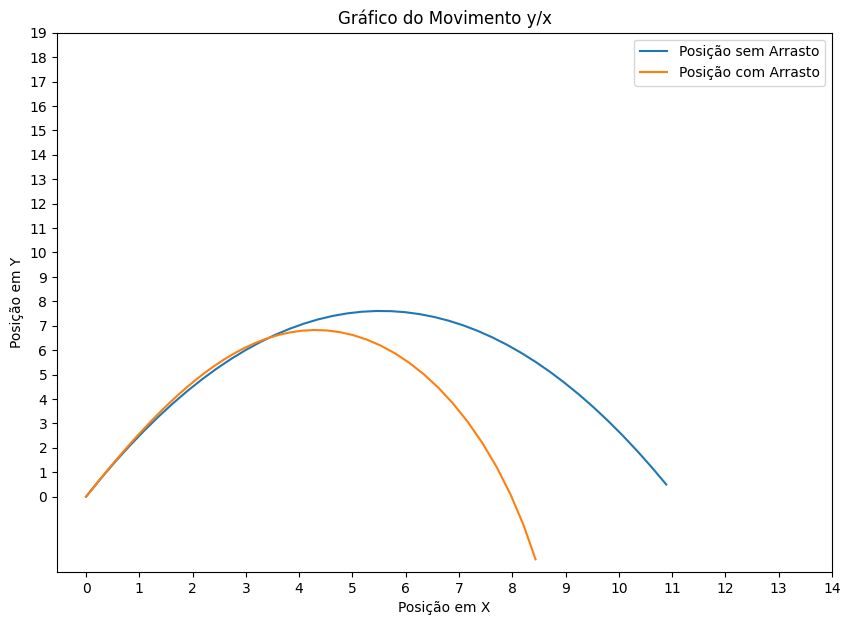

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.plot(tmpx,tmpy, label="Posição sem Arrasto")
ax.plot(x,y, label="Posição com Arrasto")
ax.set_title("Gráfico do Movimento y/x")
ax.set_xlabel("Posição em X")
ax.set_ylabel("Posição em Y")
ax.legend()
plt.xticks(range(0, 15))
plt.yticks(range(0, 20, 1))
plt.show()